In [2]:
#standard modules
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import scipy as sp
import os
import pandas as pd

# Modules for data-analysis
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.stats import multicomp

# Module for working with Excel-files
import xlrd

# 1. One or Two groups 

# Paired t-Test and Wilcoxon signed rank sum test

The daily energy intake from 11 healthy women is [5260., 5470., 5640., 6180., 6390., 6515., 6805., 7515., 7515., 8230., 8770.] kJ. 

Is this value significantly different from the recommended value of 7725?

In [3]:
def OneGroup():

    #loading the data

    data = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770], dtype=float) 
    compareValue = 7725 #recommended value to compare to

    #running a normality test
    (_, p) = stats.normaltest(data) 
    if p > 0.05:
        print('Data are distributed normally, p = {0}'.format (p))
    
    #running one sample t-test
    t, prob = stats.ttest_1samp(data, compareValue) 
    if prob < 0.05:
        print('With the one-sample t-test, {0:4.2f} is significantly different from the mean (p={1:5.3f}) .'.\
              format(compareValue, prob)) 
    else:
        print('No difference from reference value with onesample t-test.')
    
    #running wilcoxon test
    (_,p) = stats.wilcoxon(data-compareValue) 
    if p < 0.05:
        print('With the Wilcoxon test, {0:4.2f} is significantly different from the mean (p={1:5.3f}) .'.\
                format(compareValue, p))
    else:
        print('No difference from reference value with Wilcoxon rank sum test.')

               
OneGroup()
    

Data are distributed normally, p = 0.6813132824061632
With the one-sample t-test, 7725.00 is significantly different from the mean (p=0.018) .
With the Wilcoxon test, 7725.00 is significantly different from the mean (p=0.024) .


/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# t-Test of independent samples

In a clinic, 15 lazy patients weigh [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64, 76, 81, 86] kg, and 15 sporty patients weigh [ 64, 65, 56, 62, 59, 76, 66, 82, 91, 57, 92, 80, 82, 67, 54] kg.

Are the lazy patients significantly heavier?

# Normality test

Are the two data sets normally distributed?


# Mann–Whitney test

Are the lazy patients still heavier, if you check with the Mann–Whitney test?

In [4]:
def TwoGroups():
    
    #loading the data
    
    data0 = [76., 101., 66., 72., 88., 82., 79., 73., 76., 85., 75., 64., 76., 81., 86.]
    data1 = [64., 65., 56., 62., 59., 76., 66., 82., 91., 57., 92., 80., 82., 67., 54.]

    
     #running a normality test
        
    for ii, data in enumerate((data0, data1)): 
        (_, pval) = stats.normaltest(data)
        if pval > 0.05:
            print('Dataset # {0} is normally distributed'. format(ii))
            
    #t-test of independent samples
    
    t, pval = stats.ttest_ind(data0, data1) 
    if pval < 0.05:
        print('With the T-test, lazyPatients and sportyPatients are significantly different (p = {0:5.3f})'.format( pval))
    else:
        print('No difference between lazyPatients and sportyPatients with T-test.')

        
    #Mann-whitney test
    
    if int(sp.__version__.split('.')[1]) > 16: 
        u, pval = stats.mannwhitneyu(data0, data1, alternative='two-sided')
    else:
        u, pval = stats.mannwhitneyu(data0, data1)
        pval *= 2 # because the default was a one-sided p-value

    if pval < 0.05:
        print('With the Mann-Whitney test, data0 and data1 are significantly different(p = {0:5.3f})'.format( pval))
    else:
        print('No difference between data0 and data1 with Mann-Whitney test.')
        
TwoGroups()

Dataset # 0 is normally distributed
Dataset # 1 is normally distributed
With the T-test, lazyPatients and sportyPatients are significantly different (p = 0.045)
No difference between data0 and data1 with Mann-Whitney test.


/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 2. Multiple Groups


Get the data

The file “statsintro_python-master/ipynb/Data/data_others /Table 6.6 Plant experiment.xls”, contains data from an experiment with plants in three different growing conditions. 

Read the data into Python. Hint: use the module xlrd.


# Perform an ANOVA
Are the three groups different?

# Multiple Comparisons
Using the Tukey test, which of the pairs are different?

# Kruskal–Wallis
Would a nonparametric comparison lead to a different result?

            df    sum_sq   mean_sq         F   PR(>F)
C(group)   2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN
One of the groups is different.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
   Control TreatmentA   -0.371 0.3909 -1.0622 0.3202  False
   Control TreatmentB    0.494  0.198 -0.1972 1.1852  False
TreatmentA TreatmentB    0.865  0.012  0.1738 1.5562   True
-----------------------------------------------------------
['Control' 'TreatmentA' 'TreatmentB']


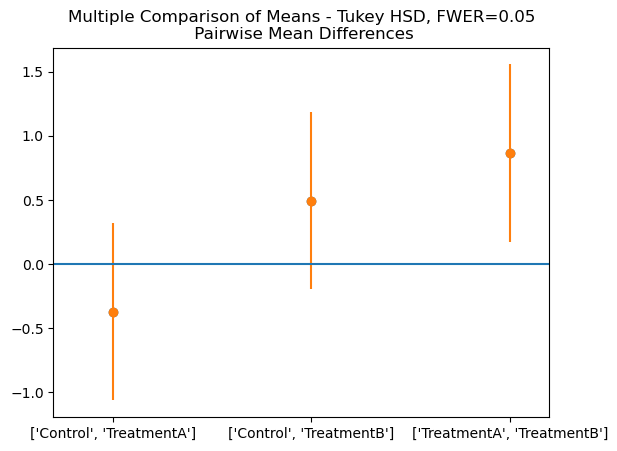

Result from Kruskal-Wallis test: p = 0.018423755731471966
Result from Kruskal-Wallis test indicates that a nonparametric comparison would not lead to a different result


In [5]:
#Loading the ANOVA data
def get_ANOVA_data():
    
    #opening the file using the module xlrd
    inFile = 'Table 6.6 Plant experiment.xls'
    book = xlrd.open_workbook(inFile)
    
    #assuming that the data is in the first sheet
    
    sheet = book.sheet_by_index(0)
    
    #treatment information is in column E
    #weight information is in column F
    
    treatment = sheet.col_values(4) 
    weight = sheet.col_values(5)
    
    #need to skip the first three lines since the useful information starts on line 4
    #can use a pandas dataframe
    
    data = pd.DataFrame({'group':treatment[3:], 'weight': weight[3:]})
    
    return data

#running the ANOVA test
def do_ANOVA(data):
    
    #applying the "ordinary least square (ols)" model on the data
    model = ols('weight ~ C(group)', data).fit()
    
    #"anova_lm" (where "lm" stands for "linear model") extracts the ANOVA-parameters from the fitted model.

    anovaResults = anova_lm(model) 
    print(anovaResults)
    
    if anovaResults['PR(>F)'][0] < 0.05:
        print('One of the groups is different.')

#running multiple comparisons  
def compare_many(data):
    
    mc = multicomp.MultiComparison(data['weight'], data['group'])
    print(mc)
    print(mc.tukeyhsd().summary())
    
    print(mc.groupsunique)
    
    res2 = mc.tukeyhsd()
    
    simple = False
    if simple:
        res2.plot_simultaneous()
        
    else:
        xvals = np.arange(3)
        plt.plot(xvals, res2.meandiffs, 'o')
        errors = np.ravel(np.diff(res2.confint)/2) 
        plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt= 'o')

        xlim = -0.3, 2.2
        plt.hlines(0, *xlim)
        plt.xlim(*xlim)
        
        pair_labels = mc.groupsunique[np.column_stack(res2. _multicomp.pairindices)]
        pairs = pair_labels.tolist()
        plt.xticks(xvals, pairs)
        plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' +'\n Pairwise Mean Differences') 
    
    plt.show()
    
    
def KruskalWallis(data):
    g_a = data['weight'][data['group']=='TreatmentA'] 
    g_b = data['weight'][data['group']=='TreatmentB'] 
    g_c = data['weight'][data['group']=='Control']
    
    
    h, p = stats.kruskal(g_c, g_a, g_b)
    print('Result from Kruskal-Wallis test: p = {0}'.format(p))
    print('Result from Kruskal-Wallis test indicates that a nonparametric comparison would not lead to a different result')
get_ANOVA_data()
do_ANOVA(get_ANOVA_data())
compare_many(get_ANOVA_data())
KruskalWallis(get_ANOVA_data())